<a href="https://colab.research.google.com/github/tae-min-lee/t-m-po/blob/master/%EA%B3%BC%EC%A0%9CHistogram_Equalization_%EC%9D%84_%EC%B9%BC%EB%9F%AC_%EC%98%81%EC%83%81%EC%97%90_%EC%A0%81%EC%9A%A9%ED%95%98%EB%8A%94_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Histogram Equalization 을 칼러 영상에 적용하는 예제

###  이미지 불러오기

* 이미지를 불러오고 B,G,R에 대하여 각각 히스토그램을 그려보았다

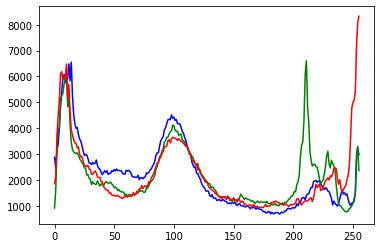

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/My Drive/[10]Lecture/ImageProcessing/Images/car.jpg')

colors = ['b','g','r']

bgr = cv2.split(img)

for (i,j) in zip(bgr,colors):
  hist = cv2.calcHist([i],[0],None,[256],[0,256])
  plt.plot(hist,color = j)



(<matplotlib.image.AxesImage at 0x7fb5a6692550>, Text(0.5, 1.0, 'orginal'))

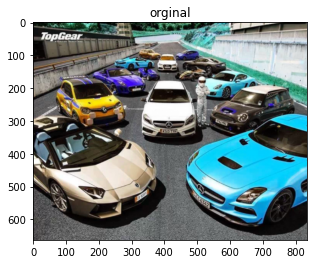

In [6]:
plt.imshow(img),plt.title('orginal')

### 컬러 이미지에서 histogram equalization
* 컬러 이미지의 경우 BGR의 히스토그램 분포가 달라 각각의 채널에 Equalization을 적용하면 원하지 않은 사진이 나오기 때문에 HSV나 YCbCr로 이미지를 바꿔 색의 비율을 건들이지 않고 휘도나 명도 채널에 대해서 histogram equalization을 진행해야된다.

* 밝기 요소인 Y에 대해서만 histogram equalization을 진행하였다

* opencv에서 제공해주는 equalizeHist()함수를 사용하여 equaliztion을 진행

(<matplotlib.image.AxesImage at 0x7fb5a5bbcb00>, Text(0.5, 1.0, 'orginal'))

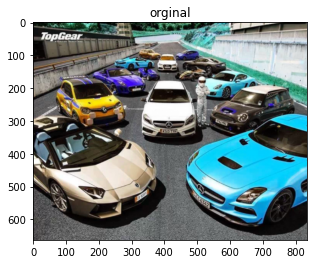

In [16]:
import numpy as np
import cv2

img_ycrcb = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)
ycrcb = cv2.split(img_ycrcb)

# histogram equalization 진행
ycrcb[0] = cv2.equalizeHist(ycrcb[0])

equal_ycrcb = cv2.merge(ycrcb)
euqal = cv2.cvtColor(equal_ycrcb,cv2.COLOR_YCR_CB2BGR)

plt.imshow(img),plt.title('orginal')

(<matplotlib.image.AxesImage at 0x7fb5a5ba2668>,
 Text(0.5, 1.0, 'equalization'))

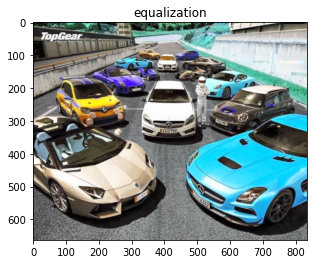

In [17]:
plt.imshow(euqal),plt.title('equalization')

### 차이가 크게 나지 않았다...

grayscale로 바꿔서 다시 eualization을 진행해봄



(<matplotlib.axes._subplots.AxesSubplot at 0x7fb5a5c47fd0>,
 Text(0.5, 1.0, 'equalization'))

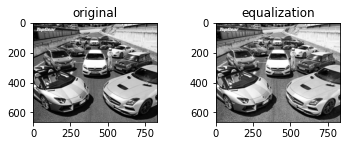

In [20]:
img_gray = cv2.imread('/content/drive/My Drive/[10]Lecture/ImageProcessing/Images/car.jpg',0)

equal_gray_img = cv2.equalizeHist(img_gray)

plt.subplot(2,2,1),plt.imshow(img_gray,'gray'),plt.title('original')
plt.subplot(2,2,2),plt.imshow(equal_gray_img,'gray'),plt.title('equalization')


### grayscale도 크게 차이점을 느끼지는 못했다